In [3]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt


In [4]:
N = 5
x_ket = basis(N,0)
y_ket = basis(N,1)
z_ket = basis(N,2)
a_ket = basis(N,3)
b_ket = basis(N,4)

x_bra = x_ket.dag()
y_bra = y_ket.dag()
z_bra = z_ket.dag()
a_bra = a_ket.dag()
b_bra = b_ket.dag()

x_id = fock_dm(N, 0)
y_id = fock_dm(N, 1)
z_id = fock_dm(N,2)
a_id = fock_dm(N, 3)
b_id = fock_dm(N, 4)

spont_collapse = b_ket*y_bra
cav_collapse  = a_ket*x_bra

g0 = 2*np.pi * 3
rabi = 2*np.pi * 3
gamma = 2*np.pi *0.1
kappa = 2*np.pi *0.3
delta = 2*np.pi * 0

s1 = rabi
c1 = 2*g0
S2 = np.sqrt(4*g0**2+rabi**2)

psi0 = c1*z_ket-s1*x_ket
psi0 /= psi0.norm()
psi1 = psi0 -4j*kappa*g0*rabi/(4*g0**2+rabi**2)*y_ket
psi1 /= psi1.norm()

theory_eff = 1/(1+16*gamma*g0**2*kappa/(4*g0**2+rabi**2)**2)

H = -g0*(x_ket*y_bra + y_ket*x_bra) - rabi/2*(z_ket*y_bra + y_ket*z_bra)
H1 = -g0*(x_ket*y_bra + y_ket*x_bra)
H2 = -1/2*(z_ket*y_bra + y_ket*z_bra)
H0 = [H1, [H2, 'omega']]
H3 = [H1, [H2, 'np.piecewise(t, [t<switch_lim], [omega, 0])']]

c_ops = [np.sqrt(gamma/2)*spont_collapse, np.sqrt(kappa/2)*cav_collapse]

num_step = 10001
time  = np.linspace(0,10,num_step)

H_args = {'switch_lim': time[5009], 'omega': rabi}
opts = Options(rhs_reuse=True)
for i in range(180):
    # result = mesolve(H0, psi1, time[:5010], c_ops,options = opts, args = H_args)
    # H_args['omega'] = 0
    # result2 = mesolve(H0, result.states[-1], time[5009:], c_ops, options=opts, args = H_args)
    # H_args['omega'] = rabi
    result3 = mesolve(H3, psi1, time, c_ops, args=H_args, options=opts)

# rat_dat = [expect(z_id, state)/expect(x_id, state) for state in result.states]
# rat_dat2 = [expect(y_id, state)/expect(x_id, state) for state in result.states]
# eff_dat = []
# for state in result.states:
#     y_pop = expect(y_id, state)
#     x_pop = expect(x_id, state)
#     if x_pop == 0:
#         eff_dat.append(0)
#     else:
#         eff_dat.append(1/(1+gamma*y_pop/(kappa*x_pop)))
# plt.plot(time, rat_dat)
# fig,ax = plt.subplots(1,2)
# ax.plot(time, eff_dat)
# ax.set_title('Approx Efficiency')
# ax.set_xlabel('Time')
# ax.set_ylabel('$\eta$')


NameError: name 'result3' is not defined

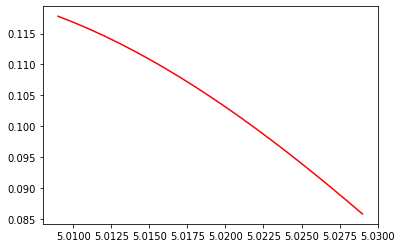

In [3]:
fig, ax = plt.subplots(1,1)

ax.plot(time[5009:5030], expect(x_id, result2.states)[:21], 'r')
ax.plot(time[4950:5030], expect(x_id, result3.states)[4950:5030])
ax.plot(time[4950:5010], expect(x_id, result.states)[4950:5010], 'r')
fig.set_size_inches(17,8)


In [ ]:
print(time[500:502])

[0.5   0.501]
